In [1]:
import healpy as hp 
import sys
sys.path.append('../')
import matplotlib.pyplot as plt
import os
import numpy as np
from tqdm import tqdm

In [2]:
%load_ext autoreload
%autoreload 2
from taunet.simulation import CMBmap, FGMap, SkySimulation,CMBspectra,MakeSims

In [3]:
main_dir = '/marconi/home/userexternal/aidicher/storage/TAUNET'
paramdir = '/marconi/home/userexternal/aidicher/workspace/taunet/taunet/template_fitting'

In [8]:
m = MakeSims(main_dir,fg=['s1','d1'],noise_g=False,nsim=50,ssim=0,fullsky=False)

Saved power spectra
tau = 0.06


Generating 353 GHz maps: 100%|██████████| 50/50 [00:00<00:00, 10837.99sim/s]

Generating noise covariance matrices: NoiseModel


In [9]:
m.plot_cleaned(50,unit='K')

  0%|          | 0/50 [00:00<?, ?it/s]

 24%|██▍       | 12/50 [00:11<00:37,  1.01it/s]

In [ ]:
band = 143
m.make_params(band,paramdir)
m.job_file(band, paramdir)

In [ ]:
m.submit_job(band,paramdir)

Submitted batch job 12901691


In [4]:
s0d0_fs = MakeSims(main_dir,fg=['s0','d0'],noise_g=True,nsim=50,ssim=0,fullsky=True)
s0d0 = MakeSims(main_dir,fg=['s0','d0'],noise_g=True,nsim=50,ssim=0,fullsky=False)
s1d1 = MakeSims(main_dir,fg=['s1','d1'],noise_g=True,nsim=50,ssim=0,fullsky=False)
s1d1_roger = MakeSims(main_dir,fg=['s1','d1'],noise_g=False,nsim=50,ssim=0,fullsky=False)

Saved power spectra
tau = 0.06


Generating 353 GHz maps: 100%|██████████| 50/50 [00:00<00:00, 14049.39sim/s]

Generating noise covariance matrices: NoiseModelGaussian


Saved power spectra
tau = 0.06


Generating 353 GHz maps: 100%|██████████| 50/50 [00:00<00:00, 999.88sim/s]

Generating noise covariance matrices: NoiseModelGaussian


Saved power spectra
tau = 0.06


Generating 353 GHz maps: 100%|██████████| 50/50 [00:00<00:00, 4483.01sim/s]

Generating noise covariance matrices: NoiseModelGaussian


Saved power spectra
tau = 0.06


Generating 353 GHz maps: 100%|██████████| 50/50 [00:00<00:00, 6484.70sim/s]

Generating noise covariance matrices: NoiseModel


In [7]:
cmbnoise_fs = SkySimulation(main_dir,0.06,fg=['s0','d0'],noise_g=True,fullsky=True,add_fg=False,add_noise=False,nsim=50)
cmbnoise_ps = SkySimulation(main_dir,0.06,fg=['s0','d0'],noise_g=True,fullsky=False,add_fg=False,add_noise=False,nsim=50)

tau = 0.06
tau = 0.06


In [8]:
cmbnoise_cl_fs = []
cmbnoise_cl_ps = []
for i in tqdm(range(50),desc='CMB noise',unit='sim'):
    emode_fs = cmbnoise_fs.Emode(100,i)
    emode_ps = cmbnoise_ps.Emode(100,i)
    cmbnoise_cl_fs.append(hp.alm2cl(emode_fs))
    cmbnoise_cl_ps.append(hp.alm2cl(emode_ps))
cmbnoise_cl_fs = np.array(cmbnoise_cl_fs)
cmbnoise_cl_ps = np.array(cmbnoise_cl_ps)

CMB noise: 100%|██████████| 50/50 [01:39<00:00,  1.98s/sim]


In [9]:
ee_t,ee_s0d0_fs = s0d0_fs.anl_cleaned(50,True)
ee_t,ee_s0d0 = s0d0.anl_cleaned(50,True)
ee_t,ee_s1d1 = s1d1.anl_cleaned(50,True)
ee_t,ee_s1d1_roger = s1d1_roger.anl_cleaned(50,True)

  0%|          | 0/50 [00:00<?, ?it/s]

100%|██████████| 50/50 [00:34<00:00,  1.44it/s]


In [10]:
l = np.arange(len(ee_t[0]))

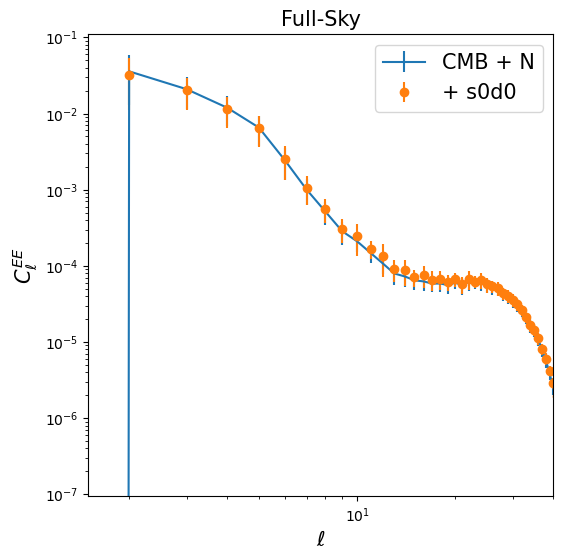

In [16]:
plt.figure(figsize=(6,6))
plt.errorbar(l,cmbnoise_cl_fs.mean(axis=0) ,yerr=cmbnoise_cl_fs.std(axis=0),label='CMB + N')
plt.errorbar(l,ee_s0d0_fs.mean(axis=0),yerr=ee_s0d0_fs.std(axis=0),fmt='o',label='+ s0d0')
plt.loglog()
plt.title('Full-Sky', fontsize=15)
plt.legend(fontsize=15)
plt.xlim(1.5,40)
plt.xlabel('$\ell$', fontsize=15)
plt.ylabel('$C_\ell^{EE}$', fontsize=15)
plt.savefig('fullsky.pdf',dpi=300,bbox_inches='tight')

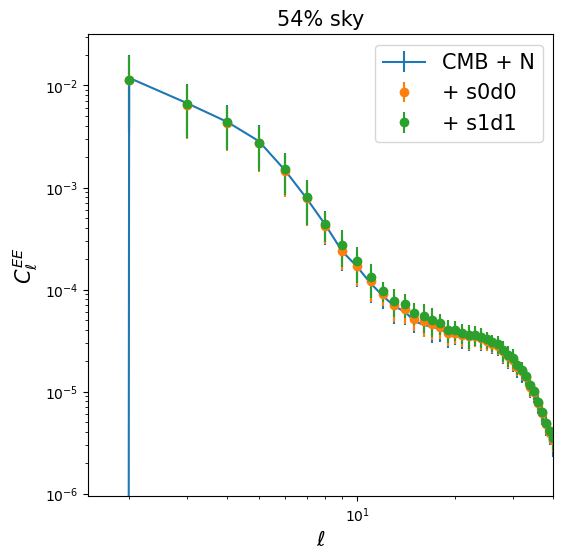

In [17]:
plt.figure(figsize=(6,6))
plt.errorbar(l,cmbnoise_cl_ps.mean(axis=0) ,yerr=cmbnoise_cl_ps.std(axis=0),label='CMB + N')
plt.errorbar(l,ee_s0d0.mean(axis=0),yerr=ee_s0d0.std(axis=0),fmt='o',label='+ s0d0')
plt.errorbar(l,ee_s1d1.mean(axis=0),yerr=ee_s1d1.std(axis=0),fmt='o',label='+ s1d1')
plt.loglog()
plt.title('54% sky', fontsize=15)
plt.legend(fontsize=15)
plt.xlim(1.5,40)
plt.xlabel('$\ell$', fontsize=15)
plt.ylabel('$C_\ell^{EE}$', fontsize=15)
plt.savefig('54sky.pdf',dpi=300,bbox_inches='tight')

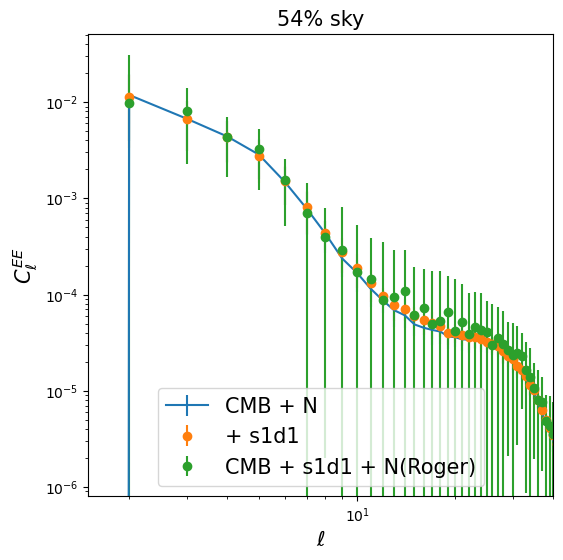

In [19]:
plt.figure(figsize=(6,6))
plt.errorbar(l,cmbnoise_cl_ps.mean(axis=0) ,yerr=cmbnoise_cl_ps.std(axis=0),label='CMB + N')
plt.errorbar(l,ee_s1d1.mean(axis=0),yerr=ee_s1d1.std(axis=0),fmt='o',label='+ s1d1')
plt.errorbar(l,ee_s1d1_roger.mean(axis=0)*1e12,yerr=ee_s1d1_roger.std(axis=0)*1e12,fmt='o',label='CMB + s1d1 + N(Roger)')
plt.loglog()
plt.title('54% sky', fontsize=15)
plt.legend(fontsize=15)
plt.xlim(1.5,40)
plt.xlabel('$\ell$', fontsize=15)
plt.ylabel('$C_\ell^{EE}$', fontsize=15)
plt.savefig('54skyR.pdf',dpi=300,bbox_inches='tight')
